IMPORTS

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from sklearn.linear_model import LogisticRegression as logi
from sklearn.model_selection import train_test_split as tts
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier as Ext
from sklearn.preprocessing import LabelEncoder
import joblib as jb

DATAFRAME LOAD

In [32]:
df=pd.read_csv("/content/drive/MyDrive/ml/HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


EVALUATING AFFECTING FEATURES

In [33]:
dfn=pd.read_csv("/content/drive/MyDrive/ml/HR_comma_sep.csv")
det=dfn.groupby("left").mean()
det

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


SALARY VS LEAVING

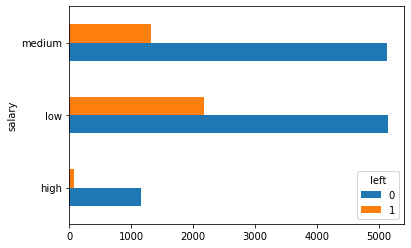

In [34]:
pd.crosstab(dfn.salary,dfn.left).plot(kind="barh")
plt.show()

DEPARTMENT VS LEAVING

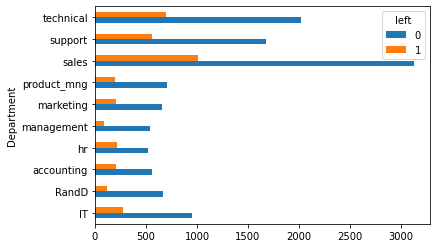

In [35]:
pd.crosstab(dfn.Department,dfn.left).plot(kind="barh")
plt.show()

DUMMIE COLUMN CREATION

In [36]:
#df2=pd.get_dummies(df["Department"])
#df=pd.concat([df,df2], axis=1)
#df=df.drop(["Department"],axis=1)
 
le=LabelEncoder()
df.salary=le.fit_transform(df.salary)
df2=df.copy()
df.Department=le.fit_transform(df.Department)
 
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


EVALUATION OF MOST VALUABLE FEATURES

In [37]:
Y=df.left
X=df.drop(["left"],axis=1)
evalMod=Ext()
evalMod.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [38]:
val=evalMod.feature_importances_

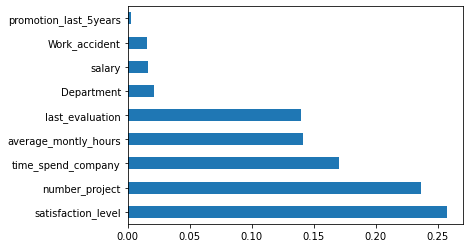

In [40]:
label=X.columns.tolist()
chart=pd.Series(val, index=label)
chart.nlargest(10).plot(kind="barh")
plt.show()

Dataset with relevant data only

In [41]:
top=chart.nlargest(3).index.tolist()
top=top+['left','salary']
df3=df2[top]
df3

,satisfaction_level,number_project,time_spend_company,left,salary
0,0.38,2,3,1,1
1,0.80,5,6,1,2
2,0.11,7,4,1,2
3,0.72,5,5,1,1
4,0.37,2,3,1,1
...,...,...,...,...,...
14994,0.40,2,3,1,1
14995,0.37,2,3,1,1
14996,0.37,2,3,1,1
14997,0.11,6,4,1,1


In [42]:
df4=pd.get_dummies(df3["salary"])
df3=pd.concat([df3,df4], axis=1)
df3=df3.drop(["salary"],axis=1)
#df3.Department=le.fit_transform(df3.Department)
df3

,satisfaction_level,number_project,time_spend_company,left,0,1,2
0,0.38,2,3,1,0,1,0
1,0.80,5,6,1,0,0,1
2,0.11,7,4,1,0,0,1
3,0.72,5,5,1,0,1,0
4,0.37,2,3,1,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,2,3,1,0,1,0
14995,0.37,2,3,1,0,1,0
14996,0.37,2,3,1,0,1,0
14997,0.11,6,4,1,0,1,0


In [43]:
Y=df3.left
X=df3.drop(["left"],axis=1)
X,Y

(       satisfaction_level  number_project  time_spend_company  0  1  2
 0                    0.38               2                   3  0  1  0
 1                    0.80               5                   6  0  0  1
 2                    0.11               7                   4  0  0  1
 3                    0.72               5                   5  0  1  0
 4                    0.37               2                   3  0  1  0
 ...                   ...             ...                 ... .. .. ..
 14994                0.40               2                   3  0  1  0
 14995                0.37               2                   3  0  1  0
 14996                0.37               2                   3  0  1  0
 14997                0.11               6                   4  0  1  0
 14998                0.37               2                   3  0  1  0
 
 [14999 rows x 6 columns], 0        1
 1        1
 2        1
 3        1
 4        1
         ..
 14994    1
 14995    1
 14996    1


Train test split

In [44]:
X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.1, random_state=42)
X_train

,satisfaction_level,number_project,time_spend_company,0,1,2
11809,0.93,4,3,0,1,0
970,0.38,2,3,0,1,0
1598,0.83,5,5,0,0,1
11804,0.64,3,2,0,1,0
2582,0.58,5,3,0,1,0
...,...,...,...,...,...,...
5191,0.52,4,3,0,1,0
13418,0.49,4,7,0,0,1
5390,0.66,5,2,0,0,1
860,0.79,4,5,0,1,0


MODEL CREATION

In [45]:
model=logi()
model.fit(X_train,y_train)
model.coef_

array([[-3.94103157, -0.16527991,  0.25209098, -1.16580109,  0.91639229,
         0.41017806]])

In [46]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

ACCURACY

In [47]:
model.score(X_test,y_test)

0.7573333333333333

DUMPING MODEL

In [48]:
jb.dump(model,'Retention')

['Retention']

In [49]:
mod2=jb.load('Retention')
mod2.score(X_test,y_test)

0.7573333333333333